
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 80 </p>
## <p style="text-align: center;">Due: September 30, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s)
1. Jocelyne Walker 
2. Shruti Kolhatkar 

# Question 1 (Understanding ElasticNet, 30 points)
Although lots of past studies have been conducted on factors affecting life expectancy using demographic variables, income composition and mortality rates, it was found that the effect of immunization and human development index was not taken into account. Hence, this motivates us to resolve this factor by formulating a regression model based on mixed effects model and multiple linear regression while considering data from 2014 for all countries. Here, important immunization like Hepatitis B, Polio and Diphtheria will also be considered. 

This dataset was taken from https://www.kaggle.com/kumarajarshi/life-expectancy-who.

**Please use Python 3.6+ for this assignment.**

First, we import packages and clean up the obtained dataset. We consider the `Life Expectancy` variable as the dependant variable whereas others are assumed to be independent variables.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_csv("life.csv", index_col=0)
print(df.shape)
df = df.loc[df['Year']==2014, :]
df = df.drop('Year', axis=1)
df = pd.get_dummies(df, columns=['Status'])
df = df.dropna()
print(df.shape)

(2938, 21)
(131, 21)


In [35]:
df.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
Albania,77.5,8.0,0,4.51,428.749067,98.0,0,57.2,1,98.0,...,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2,0,1
Algeria,75.4,11.0,21,0.01,54.237318,95.0,0,58.4,24,95.0,...,95.0,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4,0,1
Angola,51.7,348.0,67,8.33,23.965612,64.0,11699,22.7,101,68.0,...,64.0,2.0,479.312240,2692466.0,8.5,8.3,0.527,11.4,0,1
Argentina,76.2,118.0,8,7.93,847.371746,94.0,1,62.2,9,92.0,...,94.0,0.1,12245.256450,42981515.0,1.0,0.9,0.825,17.3,0,1


In [36]:
# Creating training and testing dataset
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

## Question 1.1 (5 points) 
Run Linear regression on the train dataset and print the $R^2$ values measured on (a) the training dataset and (b) the test dataset.

## Answer 1.1

In [37]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

y_train_pred = reg.predict(X_train)
print('\nTrain Model R-Squared')
print(metrics.r2_score(y_train,y_train_pred))

y_test_pred = reg.predict(X_test)
print('\nTest Model R-Squared')
print(metrics.r2_score(y_test,y_test_pred))


Train Model R-Squared
0.8869822224758938

Test Model R-Squared
0.8355055233743496


## Question 1.2 (8 points) 
Run linear regression using Lasso and determine the value of $\alpha$ that results in best test set performance. Consider `alphas=10**np.linspace(1,-2,100)*0.5`. Display the best value of $\alpha$ as well as the corresponsing $R^2$ score on test set. Use the following parameters in Lasso model. Finally, store the best model separately. Also, use the co-efficients obtained and select the [columns with non-zero weights](https://stackoverflow.com/questions/62323713/selecting-columns-of-dataframe-where-lasso-coefficient-is-nonzero) and use them to create `X_train_lasso` and `X_test_lasso`. Show how many non-zero columns are present.

    copy_X=True
    normalize=True # Normalizes data using StandardScaler()
    random_state=42

## Answer 1.2

In [40]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error

#alphas to consider
alphas=10**np.linspace(1,-2,100)*0.5

#running linear regression using Lasso for the values of alpha and storing test set R-squared 
lasso = Lasso(copy_X=True, normalize = True, random_state=42)
coefs_L = []
r_squared_L = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_L.append(lasso.coef_)
    r_squared_L.append(metrics.r2_score(y_test,lasso.predict(X_test)))

#Best alpha
print("Best Alpha =",alphas[r_squared_L.index(max(r_squared_L))])    

#Storing the model to use the best alpha
lasso.set_params(alpha=alphas[r_squared_L.index(max(r_squared_L))])

new_lasso = Lasso(alpha=alphas[r_squared_L.index(max(r_squared_L))], copy_X=True, normalize = True, random_state=42)

new_lasso.fit(X_train, y_train)
print("\nTest R-Squared =",metrics.r2_score(y_test,new_lasso.predict(X_test)))
print("\nBest model coefficients:")
print(pd.Series(new_lasso.coef_, index=X.columns))

#select the columns with non-zero weights to create X_train_lasso and X_test_lasso
print("\nNumber of coefficients that are Non-Zero")
print(len(new_lasso.coef_)-list(new_lasso.coef_).count(0))

X_train_lasso = X_train.iloc[:,new_lasso.coef_!=0]
X_test_lasso = X_test.iloc[:,new_lasso.coef_!=0]
X_train_lasso.head()

Best Alpha = 0.01424017934217901

Test R-Squared = 0.8524831845218703

Best model coefficients:
Adult Mortality                   -1.752013e-02
infant deaths                     -0.000000e+00
Alcohol                            1.027790e-02
percentage expenditure             0.000000e+00
Hepatitis B                        1.653965e-03
Measles                           -0.000000e+00
 BMI                               2.666324e-03
under-five deaths                 -5.782750e-04
Polio                             -0.000000e+00
Total expenditure                  2.605601e-01
Diphtheria                         8.198928e-03
 HIV/AIDS                         -8.513501e-01
GDP                               -0.000000e+00
Population                         0.000000e+00
 thinness  1-19 years             -0.000000e+00
 thinness 5-9 years               -2.243574e-02
Income composition of resources    3.330058e+01
Schooling                          0.000000e+00
Status_Developed                   6.735

,Adult Mortality,Alcohol,Hepatitis B,BMI,under-five deaths,Total expenditure,Diphtheria,HIV/AIDS,thinness 5-9 years,Income composition of resources,Status_Developed,Status_Developing
Country,,,,,,,,,,,,
Mauritius,148.0,0.01,97.0,32.8,0,4.81,97.0,0.1,6.9,0.769,0,1
Greece,73.0,7.53,96.0,66.0,0,8.80,99.0,0.1,0.7,0.862,0,1
Afghanistan,271.0,0.01,62.0,18.6,86,8.18,62.0,0.1,17.5,0.476,0,1
Belize,177.0,6.58,95.0,5.1,0,5.79,95.0,0.2,3.4,0.705,0,1
France,79.0,11.50,83.0,62.0,3,11.54,98.0,0.1,0.6,0.890,0,1


## Question 1.3 (6 points) 
Run linear regression using Ridge and determine the value of $\alpha$ that results in best test set performance. Consider `alphas=10**np.linspace(1,-2,100)*0.5`. Display the best value of $\alpha$ as well as the corresponsing $R^2$ score on test set. Use the following parameters in Ridge model.

    copy_X=True
    normalize=True # Normalizes data using StandardScaler()
    random_state=42

## Answer 1.3

In [39]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV
from sklearn.preprocessing import scale

#alphas to consider
alphas=10**np.linspace(1,-2,100)*0.5

#running linear regression using Lasso for the values of alpha and storing test set R-squared 
ridge = Ridge(copy_X=True, normalize = True, random_state=42)
coefs_R = []
r_squared_R = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs_R.append(ridge.coef_)
    r_squared_R.append(metrics.r2_score(y_test,ridge.predict(X_test)))

#Best alpha
print("Best Alpha =",alphas[r_squared_R.index(max(r_squared_R))])    

#Storing the model to use the best alpha
ridge.set_params(alpha=alphas[r_squared_R.index(max(r_squared_R))])

ridge.fit(X_train, y_train)
print("\nTest R-Squared =",metrics.r2_score(y_test,ridge.predict(X_test)))
print("\nBest model coefficients:")
print(pd.Series(ridge.coef_, index=X.columns))

Best Alpha = 0.005

Test R-Squared = 0.8339476898269712

Best model coefficients:
Adult Mortality                   -1.775657e-02
infant deaths                      1.549670e-02
Alcohol                            4.689961e-02
percentage expenditure            -1.222946e-04
Hepatitis B                        1.523047e-02
Measles                           -1.951048e-05
 BMI                               4.793769e-03
under-five deaths                 -1.603508e-02
Polio                             -1.911505e-02
Total expenditure                  3.070060e-01
Diphtheria                         1.059382e-02
 HIV/AIDS                         -9.050415e-01
GDP                               -4.509922e-07
Population                         5.780061e-09
 thinness  1-19 years             -8.535071e-02
 thinness 5-9 years                2.279671e-02
Income composition of resources    3.314554e+01
Schooling                         -6.746117e-02
Status_Developed                   6.093896e-01
Status

## Question 1.4  (8 points) 
Run [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) [(Video Reference)](https://youtu.be/1dKRdX9bfIo) on the `X_train_lasso` dataset by using all possible values from the below mentioned parameter set:

    l1_ratios = np.arange(0, 1.01, 0.01)  # 101 elements
    alphas = 10**np.linspace(1, -2, 100)*0.5 # 100 elements
    normalize = True
    random_state = 42


Store the $R^2$ score obtained from `X_test_lasso` set for each combination in an array with 101 rows and 100 columns. e.g.

    arr[i][j] = curr_r2_score # obtained using alphas[i] and l1_ratios[j]

where `i` is the `ith` element from `l1_ratio` and `j` is the `jth` element from `alphas`. Print the best $R^2$ score obtained using test set and its corresponding `alpha` and `l1 ratio`.

In [26]:
arr = np.zeros((101, 100)) # Create 101x100 array

Note that by varying the `l1_ratio`, you are controlling the ratio of Lasso and Ridge regularization that is present in the model. When `l1_ratio = 1`, it means that the model uses Lasso regularization only whereas when `l1_ratio = 0`, it means that the model uses Ridge regularization only. You can find the formula for the loss function [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html).

## Answer 1.4

In [31]:
from sklearn.linear_model import ElasticNet

l1_ratios = np.arange(0, 1.01, 0.01)  # 101 elements
alphas = 10**np.linspace(1, -2, 100)*0.5 # 100 elements
alphas = np.array(sorted(alphas))
i = 0
j = 0

for l in l1_ratios:
    for a in alphas:
        regr = ElasticNet(l1_ratio = l,
                  alpha = a,
                  normalize = True,
                  random_state = 42)
        regr.fit(X_train_lasso,y_train)
        curr_r2_score = metrics.r2_score(y_test,regr.predict(X_test_lasso))
        arr[i][j] = curr_r2_score
        j+=1
    i+=1
    j=0

In [32]:
print(arr)

print('\nBest R-Squared:')
print(np.amax(arr))

result = np.where(arr == np.amax(arr))

print('\nBest R-Squared\'s Elastic Net L1 Ratio:')
print(l1_ratios[result[0]])
print('\nBest R-Squared\'s Elastic Net Alpha:')
print(alphas[result[1]])

#uses lasso regularization only

[[ 0.7997616   0.79735706  0.79483812 ... -0.09340008 -0.09459029
  -0.09570241]
 [ 0.80009339  0.7977026   0.79519882 ... -0.09494728 -0.09615152
  -0.09727678]
 [ 0.80042696  0.79804991  0.79556119 ... -0.09652726 -0.09774587
  -0.09888457]
 ...
 [ 0.85118137  0.8511055   0.85102196 ... -0.11130508 -0.11130508
  -0.11130508]
 [ 0.8519138   0.8518906   0.85186344 ... -0.11130508 -0.11130508
  -0.11130508]
 [ 0.85261961  0.85264414  0.85266775 ... -0.11130508 -0.11130508
  -0.11130508]]

Best R-Squared:
0.8527563145979077

Best R-Squared's Elastic Net L1 Ratio:
[1.]

Best R-Squared's Elastic Net Alpha:
[0.00873764]


## Question 1.5 (3 points) 
Call `plot_heatmap()` using the 101x100 array from the previous question. What does this heatmap represent? Interpret the heatmap.

In [11]:
def rescale(val, in_min, in_max, out_min, out_max):
    return out_min + (val - in_min) * ((out_max - out_min) / (in_max - in_min))

def format_y(value, tick_number):
    return f'{value/100.:0.2f}'

def format_x(value, tick_number):
    return f'{rescale(value, 0., 100., 0.05, 5.):0.2f}'

def plot_heatmap(arr):
    ax = sns.heatmap(arr)
    ax.set_ylabel("L1 Ratio")
    ax.set_xlabel("alpha")
    ax.invert_yaxis()
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_x))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(format_y))

## Answer 1.5

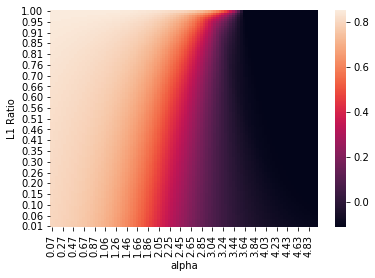

In [12]:
plot_heatmap(arr)

This heatmap represents the changes in R-Squared using the Test dataset as we use Elastic Net regularization on the data.
The x-axis represents the L1 Ratio, or the weight of Lasso versus Ridge Regularization used. As L1 Ratio approaches 1, the Lasso regularization is used primarily. Alpha, on the y-axis, is the tuning parameter used to regularize the model. A higher value of alpha represents more regularization or smoothing of the model. As alpha increases, variance of the model falls.

As we see in this heatmap, the highest values of R-Squared occur when L1 Ratio is high and Alpha is low. Regardless of alpha, when L1 Ratio is >.9, we see a R-Squared higher than 0.75. This indicates that Lasso regularization is a better fit for this model. As alpha decreases, R-squared also increases. An alpha of about 0.0087 results in the highest testing R-squared. 

Thus, the model with the highest R-squared has both a high L1 Ratio and a low alpha value.

# Question 2 (5 points)
Suppose you learn a ridge regression based on some of the independent variables available to you, and including a few interaction terms as well. Your result is disappointing, and you believe that the model is suffering from either too much bias or too much variance. Describe briefly how you will test which alternative is more likely to be true. (there is no extra data that you can use, so “get more data” is not an option).

## Answer 2

In order to figure out whether our model is suffering from either too much bias or too much variance, we can examine and test a couple of alternatives:

1. Too much bias will occur if the regularization parameter is too high. ("The model is too smooth.") In a highly biased model, we're also likely to see a high training MSE. The training R-Squared value may also be low.


2. Too much variance will occur if the regularization parameter is too low, and the model has been overfit. ("The model is too noisy.") In a model with high variance, our model is likely to have a large gap between the training MSE and the testing MSE. The standard errors of the model weights are likely to be high as there's collinearity in the terms. 

So, in summary, we must **alter the regularization parameter lambda** in order to see how the training and testing MSE change for different parameter values. 

If we decrease lambda and we see the training MSE and testing MSE fall, this model had **too much bias.** In order to reduce bias, the regularization parameter lamdba must be LOWER. 

On the other hand, if we decrease lambda and we see the training MSE fall and the testing MSE spike, this means the model has **too much variance** and has been picking up noise in the training set. The regularization parameter lambda must be HIGHER to have less variance in the model.  

# Question 3 Bias-Variance (20 pts): 

We want to build a model that can predict y for unknown inputs x.(15 pts)

(a) (5 pts) Fit a linear model to the training data, and report mean squared error on the test data. Plot the train and test points on the same plot, clearly denoting the training and testing points. On the same figure, plot the predictions of the linear model using x_all. All the plots must be in the same figure and be clearly labeled.


(b) (10 pts) Fit polynomial models of degrees 2, 3, 4 and 12 to the training data, Report mean squared error (on both train and test sets) for all the models. Plot the data (train and test points) as before.  On the same figure, plot the predictions of the polynomial models using x_all. All the plots must be in the same figure and be clearly labeled.


(c) (5 pts) Which model performed the best? Explain.


* Use the below code to load the data from the file 'ps01.data'. It is organized as a dictionary, of train and test data.

In [13]:
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x_all = np.linspace(-2,5,101).reshape(-1,1)
all_files = np.load("q3_data.npz")
x_train, y_train, x_test, y_test = all_files['arr_0'], all_files['arr_1'], all_files['arr_2'], all_files['arr_3']

### Answer

#### (a)


Testing mse =  4.739110717634691


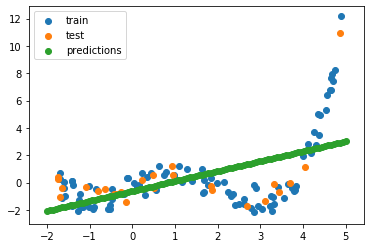

In [14]:
from sklearn import linear_model
from sklearn import metrics

reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

y_test_pred = reg.predict(x_test)
print("\nTesting mse = ",mean_squared_error(y_test, reg.predict(x_test)))
y_all_pred = reg.predict(x_all)

plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test)
plt.scatter(x_all, y_all_pred)
plt.legend(("train","test","predictions"))

### (b)


Degree 2 training mse =  3.241421853814466
Degree 2 testing mse =  3.118688012803552

Degree 3 training mse =  1.4201223351315242
Degree 3 testing mse =  1.669870363950939

Degree 4 training mse =  0.3745950147780308
Degree 4 testing mse =  0.2793974390234906

Degree 12 training mse =  0.3297484792267277
Degree 12 testing mse =  0.40228762220221337


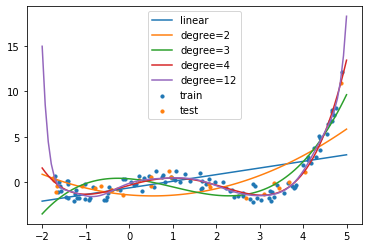

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# degree 2
poly2 = PolynomialFeatures(degree=2)
x_train_2 = poly2.fit_transform(x_train)
predict_2 = poly2.fit_transform(x_test)

clf2 = linear_model.LinearRegression()
clf2.fit(x_train_2, y_train)
clf2.predict(predict_2)
y2_all_pred = clf2.predict(poly2.fit_transform(x_all))

print("\nDegree 2 training mse = ",mean_squared_error(y_train, clf2.predict(x_train_2)))
print("Degree 2 testing mse = ",mean_squared_error(y_test, clf2.predict(predict_2)))

# degree 3
poly3 = PolynomialFeatures(degree=3)
x_train_3 = poly3.fit_transform(x_train)
predict_3 = poly3.fit_transform(x_test)

clf3 = linear_model.LinearRegression()
clf3.fit(x_train_3, y_train)
clf3.predict(predict_3)
y3_all_pred = clf3.predict(poly3.fit_transform(x_all))

print("\nDegree 3 training mse = ",mean_squared_error(y_train, clf3.predict(x_train_3)))
print("Degree 3 testing mse = ",mean_squared_error(y_test, clf3.predict(predict_3)))

# degree 4
poly4 = PolynomialFeatures(degree=4)
x_train_4 = poly4.fit_transform(x_train)
predict_4 = poly4.fit_transform(x_test)

clf4 = linear_model.LinearRegression()
clf4.fit(x_train_4, y_train)
clf4.predict(predict_4)
y4_all_pred = clf4.predict(poly4.fit_transform(x_all))

print("\nDegree 4 training mse = ",mean_squared_error(y_train, clf4.predict(x_train_4)))
print("Degree 4 testing mse = ",mean_squared_error(y_test, clf4.predict(predict_4)))

# degree 12
poly12 = PolynomialFeatures(degree=12)
x_train_12 = poly12.fit_transform(x_train)
predict_12 = poly12.fit_transform(x_test)

clf12 = linear_model.LinearRegression()
clf12.fit(x_train_12, y_train)
clf12.predict(predict_12)
y12_all_pred = clf12.predict(poly12.fit_transform(x_all))

print("\nDegree 12 training mse = ",mean_squared_error(y_train, clf12.predict(x_train_12)))
print("Degree 12 testing mse = ",mean_squared_error(y_test, clf12.predict(predict_12)))

plt.scatter(x_train,y_train, s=10)
plt.scatter(x_test,y_test, s=10)
plt.plot(x_all, y_all_pred)
plt.plot(x_all,y2_all_pred)
plt.plot(x_all,y3_all_pred)
plt.plot(x_all,y4_all_pred)
plt.plot(x_all,y12_all_pred)
plt.legend(("linear", "degree=2","degree=3","degree=4","degree=12","train","test"))

### (c)

The model that performed the best was the degree 4 polynomial with a training MSE of 0.37 and a testing MSE of .28. 

This model is the form $$ y = w_0 + w_1x_1 + w_2x_1^{2} + w_3x_1^{3} + w_4x_1^{4} $$

We can see this visually as the brown fit line in the plot fits the training and testing data the best.

The degree 12 model overfit the data, as the training MSE fell to 0.32 but the testing MSE increased to 0.40. 

# Question 4 - Stochastic Gradient Descent (25 pts)

1. (5pts) Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model: $$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, include the image in your notebook and upload the image in the submission.


2. (20pts) Write Python code for an SGD solution to the non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$  Try to format similarly to scikit-learn's models. The template of the class is given. The init function of the class takes as input the learning_rate, regularization_constant and number of epochs. The fit method must take as input X,y. The _predict_ method takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100] . Plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) for the best 2 combinations of learning_rate and regularization for SGD. (2pts) Report the MSE at the end of 15 epochs for the two best combinations.


In [111]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.coef = np.array([1.0,1.0,1.0,1.0])
        self.gradient = np.array([1.0,1.0,1.0,1.0])
        
    def sgd(self, gradient):
        j = 0
        for i in range(len(self.coef)):
            #print("a. coef",self.coef[i])
            #print("b. learning rate", self.learning_rate)
            #print("c. gradient", gradient[i])
            self.coef[i] += ((self.learning_rate * gradient[i])) #+ 2*self.regularization*self.coef[i]) # = please fill this to update self.coef using SGD
            #print("new coef", self.coef[i])
            j += 1
            
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = np.zeros((self.n_epoch, 4))
        self.cache = np.zeros(self.coef.shape)
        self.v = np.zeros(self.coef.shape)
        self.decay_rate = 0.9
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                prediction =  np.sum(np.transpose(self.coef)*X[i])
                error = (y[i] - prediction)
                #print("Error",error)
                # Compute gradients
                theta = X[i] 
                                
                self.gradient[0] = 2*error + 2*self.regularization*self.coef[0]
                self.gradient[1] = 2*error*X[i][0] + 2*self.regularization*self.coef[1]
                self.gradient[2] = 2*error*X[i][0]*X[i][1] + 2*self.regularization*self.coef[2]
                self.gradient[3] = 2*error*-1*math.exp(-1*X[i][0]) + 2*self.regularization*self.coef[3]
                #print("Gradient", self.gradient)
                
                # Update weights
                self.sgd(self.gradient)
                #print("Coefs:", self.coef)
            #print(self.coef)
            coefs[epoch][0] =self.coef[0]
            coefs[epoch][1] =self.coef[1]
            coefs[epoch][2] =self.coef[2]
            coefs[epoch][3] =self.coef[3]

            #print(coefs)
            residuals = y - np.sum(np.transpose(self.coef)*X)         
            mse.append(np.mean(residuals**2))
            #print("Epoch mse", mse)

        self.lowest_mse = mse[-1]
        print("Lowest MSE:",self.lowest_mse)
        #print("Self coef", self.coef)
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        return x
    
    def linearPredict(self, X):  
        #compute dot product of self.coef and X
        prediction = np.dot(self.coef,X)
        return prediction
    
   

In [29]:
data = pd.read_csv('q4_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

## Answer 

### 1.

Model: $$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$

Loss function: $$ L = (\hat{y} - y)^{2} $$

Coefficient updates: $$ w_{new} = w_{current} - \eta \frac{\partial L}{\partial w_{current}} $$

$w_0$ update:

$ w_0' = w_0 - \eta \frac{\partial L}{\partial w_0} $

where 

$ \frac{\partial L}{\partial w_0} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial w_0} $

$ \frac{\partial L}{\partial \hat{y}} = 2(\hat{y} - y) $ 

$\frac{\partial \hat{y}}{\partial w_0} = 1$

$$w_0' = w_0 - \eta [2(\hat{y} - y)] $$



$w_1$ update:

$ w_1' = w_1 - \eta \frac{\partial L}{\partial w_1} $

where 

$ \frac{\partial L}{\partial w_1} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial w_1} $

$ \frac{\partial L}{\partial \hat{y}} = 2(\hat{y} - y) $ 

$\frac{\partial \hat{y}}{\partial w_1} = x_1$

$$ w_1' = w_1 - \eta [2(\hat{y} - y) \cdot x_1] $$



$w_2$ update:

$ w_2' = w_2 - \eta \frac{\partial L}{\partial w_2} $

where 

$ \frac{\partial L}{\partial w_2} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial w_2} $

$ \frac{\partial L}{\partial \hat{y}} = 2(\hat{y} - y) $ 

$\frac{\partial \hat{y}}{\partial w_2} = x_1 \cdot x_2$

$$ w_2' = w_2 - \eta [2(\hat{y} - y) \cdot (x_1 \cdot x_2)] $$



$w_3$ update:

$ w_3' = w_3 - \eta \frac{\partial L}{\partial w_3} $

where 

$ \frac{\partial L}{\partial w_3} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial w_3} $

$ \frac{\partial L}{\partial \hat{y}} = 2(\hat{y} - y) $ 

$\frac{\partial \hat{y}}{\partial w_3} = -e^{-x_1}$

$$ w_3' = w_3 - \eta [2(\hat{y} - y) \cdot -e^{-x_1}] $$

### 2. Updated the code in the functions above. 

Lowest MSE: 4468.277940552006


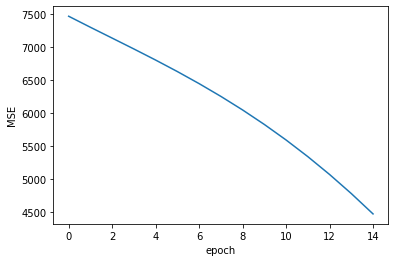

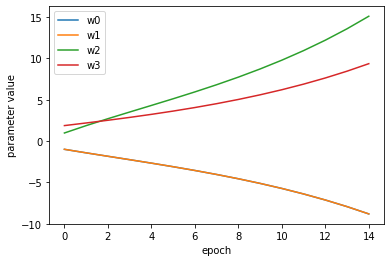

In [112]:
reg = Regression(.01, 0.01, 15)

reg.fit(X=X, y=y, plot=True)

### Using SGD


In [113]:
for r in regularization:
    for l in learning_rate:
        print("Regularization:",r)
        print("Learning rate:",l)
        reg = Regression(l, r, n_epochs)
        reg.fit(X=X,y=y)

Regularization: 0
Learning rate: 0.0001
Lowest MSE: 49156.46371105431
Regularization: 0
Learning rate: 0.001
Lowest MSE: 10292.146020535487
Regularization: 0
Learning rate: 0.01
Lowest MSE: 7143.098723558292
Regularization: 0
Learning rate: 0.1
Lowest MSE: 21504.430910223902
Regularization: 0
Learning rate: 1


C:\Users\jocel\anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: overflow encountered in square
C:\Users\jocel\anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in double_scalars
C:\Users\jocel\anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in double_scalars
C:\Users\jocel\anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in double_scalars
C:\Users\jocel\anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in double_scalars
C:\Users\jocel\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\jocel\anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jocel\anaconda3\lib\site-packages\ipykernel_launcher.py:44: Runtim

Lowest MSE: nan
Regularization: 0
Learning rate: 10
Lowest MSE: nan
Regularization: 0
Learning rate: 100


C:\Users\jocel\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Lowest MSE: nan
Regularization: 10
Learning rate: 0.0001
Lowest MSE: 2.2157613598073453e+17
Regularization: 10
Learning rate: 0.001
Lowest MSE: 2.001162491266235e+131
Regularization: 10
Learning rate: 0.01
Lowest MSE: nan
Regularization: 10
Learning rate: 0.1
Lowest MSE: nan
Regularization: 10
Learning rate: 1
Lowest MSE: nan
Regularization: 10
Learning rate: 10
Lowest MSE: nan
Regularization: 10
Learning rate: 100
Lowest MSE: nan
Regularization: 100
Learning rate: 0.0001
Lowest MSE: 2.2642195581437446e+133
Regularization: 100
Learning rate: 0.001
Lowest MSE: nan
Regularization: 100
Learning rate: 0.01
Lowest MSE: nan
Regularization: 100
Learning rate: 0.1
Lowest MSE: nan
Regularization: 100
Learning rate: 1
Lowest MSE: nan
Regularization: 100
Learning rate: 10
Lowest MSE: nan
Regularization: 100
Learning rate: 100
Lowest MSE: nan


The two best learning rates are 0.001 and 0.01 with 0 regularization.

The two best MSEs for these are 10,292 and 7143 respectively.

Plotting the two best learning rates:

Lowest MSE: 10292.146020535487
Lowest MSE: 7143.098723558292


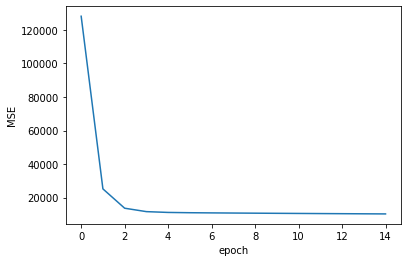

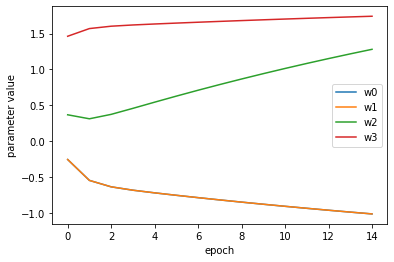

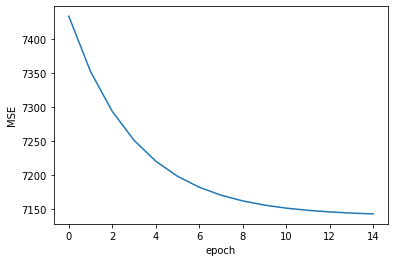

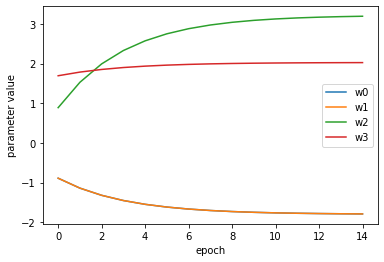

In [101]:
reg = Regression(0.001, 0, n_epochs)
reg.fit(X=X,y=y,plot=True)

reg = Regression(0.01, 0, n_epochs)
reg.fit(X=X,y=y,plot=True)

We see that using a regularization constant close to 0 improves the MSE. A learning rate of 0.01 and a ridge regression constant of 0.02 reduce the MSE to 210. 

Lowest MSE: 210.200131549614


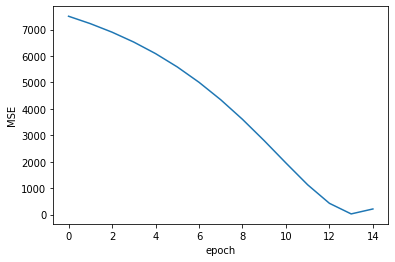

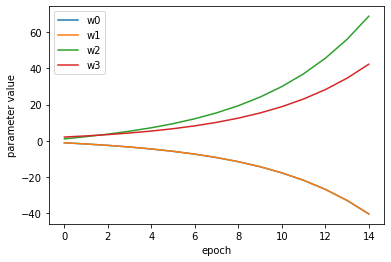

In [123]:
reg = Regression(.01, 0.02, 15)
reg.fit(X=X, y=y, plot=True)